|Challenge Set |**3 **                                 |
|-------------:|:--------------------------------------|
|Topic:        |Linear Regression and Train/Test Split |
|Date:         |07/24/2016                             | 
|Name:         |Bryant Biggs                           |
|Worked with:  |N/A                                    |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
---

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import pandas as pd
import numpy as np

from patsy import dmatrices
import statsmodels.api as sm

# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")

In [2]:
data_file = 'data.csv'

# read in data and select columns of interest
df = pd.read_csv('../../../challenges_data/2013_movies.csv', encoding='utf-8')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['Budget'] = pd.to_numeric(df['Budget'])/1000000
df['DomesticTotalGross'] = pd.to_numeric(df['DomesticTotalGross'])/1000000

# drop NaNs
df = df.dropna(axis=0, how='any')

# shorten column names
df = df.rename(columns = {'ReleaseDate':'Released', 'DomesticTotalGross':'Dom_Gross'})
df.head()

,Title,Budget,Dom_Gross,Director,Rating,Runtime,Released
0,The Hunger Games: Catching Fire,130.0,424.668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200.0,409.013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150.0,400.738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76.0,368.061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225.0,291.045518,Zack Snyder,PG-13,143,2013-06-14


# <a id='1'></a>Challenge 1:
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [3]:
from sklearn.linear_model import LinearRegression

# add column of all 1's
df['Static'] = 1

X = df[['Static']]
y = df['Dom_Gross']

# linear regression model
lrm = LinearRegression()
mdl = lrm.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [4]:
# model intercept and coefficients
pred = 1
print('Intercept: {0}'.format(mdl.intercept_))
print('Coeficient: {0}'.format(mdl.coef_))
print('Prediction value for {0}: {1}'.format(pred, mdl.predict(pred)))
print('Mean: {0}'.format(df['Dom_Gross'].mean()))

Intercept: 103.5152756436782
Coeficient: [ 0.]
Prediction value for 1: [ 103.51527564]
Mean: 103.5152756436782


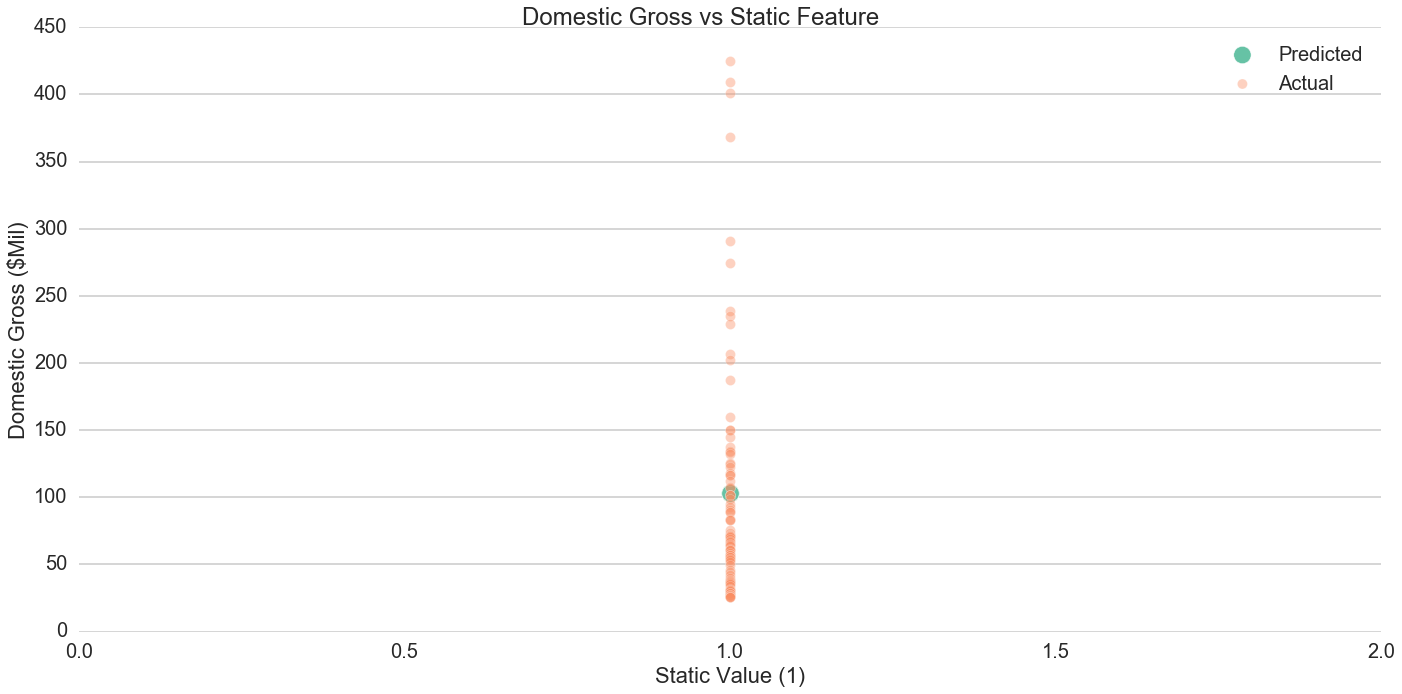

In [5]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# color 
colors = sns.color_palette('Set2',12)

# plots
ax.scatter(X, mdl.predict(X), s=300, c=colors[0], alpha=1, label='Predicted', edgecolor='w')
ax.scatter(X, y, s=100, c=colors[1], alpha=0.4, label='Actual', edgecolor='w')

# axis limits
plt.xlim(0,2)

# labels/titles
plt.legend(loc='upper right');
plt.suptitle('Domestic Gross vs Static Feature')
plt.xlabel('Static Value (1)')
plt.ylabel('Domestic Gross ($Mil)')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

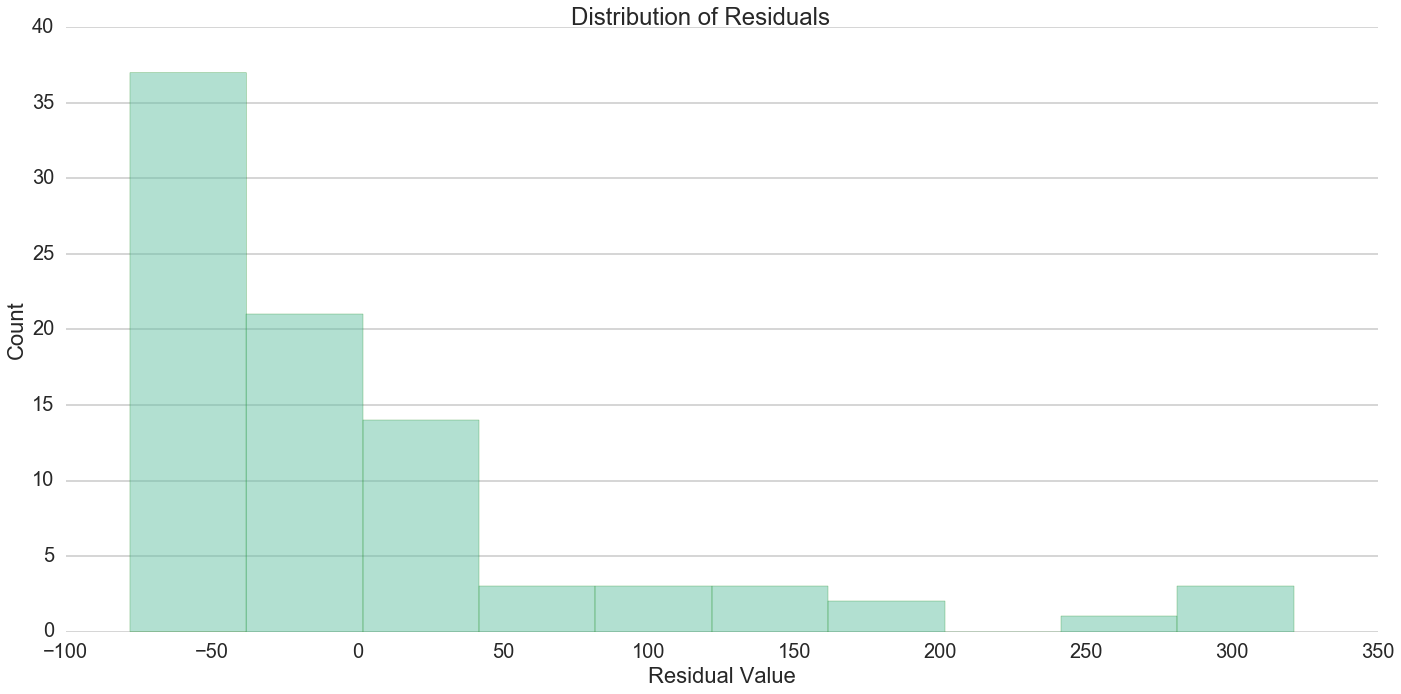

In [6]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# color 
colors = sns.color_palette('Set2',12)

# plots
res = y - mdl.predict(X)
ax.hist(res, edgecolor='g', alpha = 0.5, color=colors[0])

# labels/titles
plt.suptitle('Distribution of Residuals')
plt.ylabel('Count')
plt.xlabel('Residual Value')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 1 is:
* What does it predict?

<font color='blue'>It appears that the model is defaulting to the mean value for the prediction; I am not quite sure why or how though.</font>

* How are the residuals distributed?

<font color='blue'>The histogram of the residuals shows a right skew in the distribution.</font>

___

# <a id='2'></a>Challenge 2:
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [7]:
features = ['Static', 'Budget']
X2 = df[features]
y2 = df['Dom_Gross']

# linear regression model
lrm2 = LinearRegression()
mdl2 = lrm2.fit(X2,y2)

In [8]:
# model intercept and coefficients
coefs = list(zip(features, mdl2.coef_))

print('Intercept: {0}'.format(mdl2.intercept_))
print('Coeficients: {0}'.format(coefs))

Intercept: 44.43062561794839
Coeficients: [('Static', 0.0), ('Budget', 0.7830550007218362)]


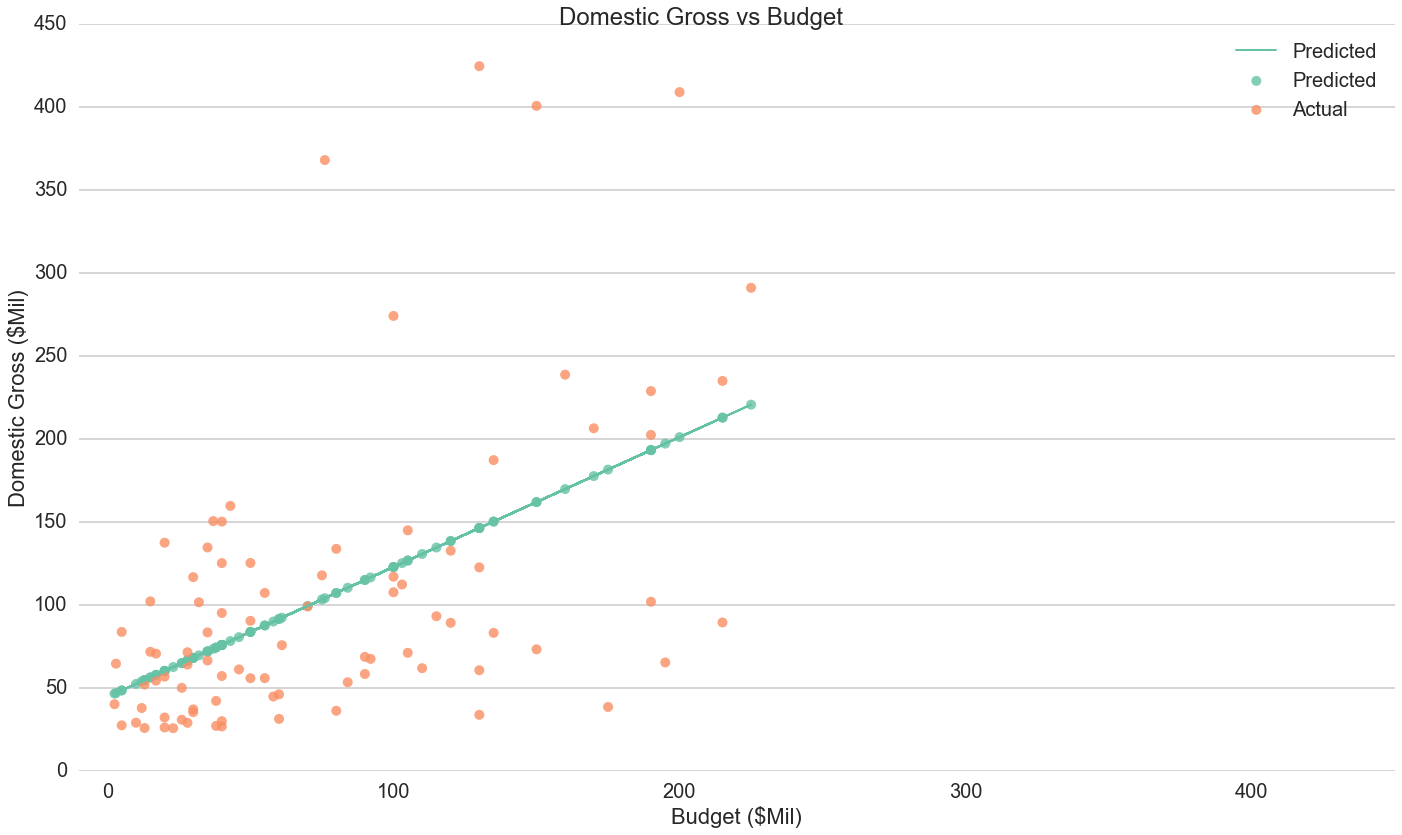

In [9]:
# make figure
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

# color 
colors = sns.color_palette('Set2',12)

# plots
ax.plot(df['Budget'], mdl2.predict(X2), color=colors[0], linewidth=2.0, label='Predicted')
ax.scatter(df['Budget'], mdl2.predict(X2), s=100, c=colors[0], alpha=0.8, label='Predicted', edgecolor='None')
ax.scatter(df['Budget'], df['Dom_Gross'], s=100, c=colors[1], alpha=0.8, label='Actual', edgecolor='None')

# axis limits
plt.xlim(-10,450)

# labels/titles
plt.legend(loc='upper right');
plt.suptitle('Domestic Gross vs Budget')
plt.xlabel('Budget ($Mil)')
plt.ylabel('Domestic Gross ($Mil)')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

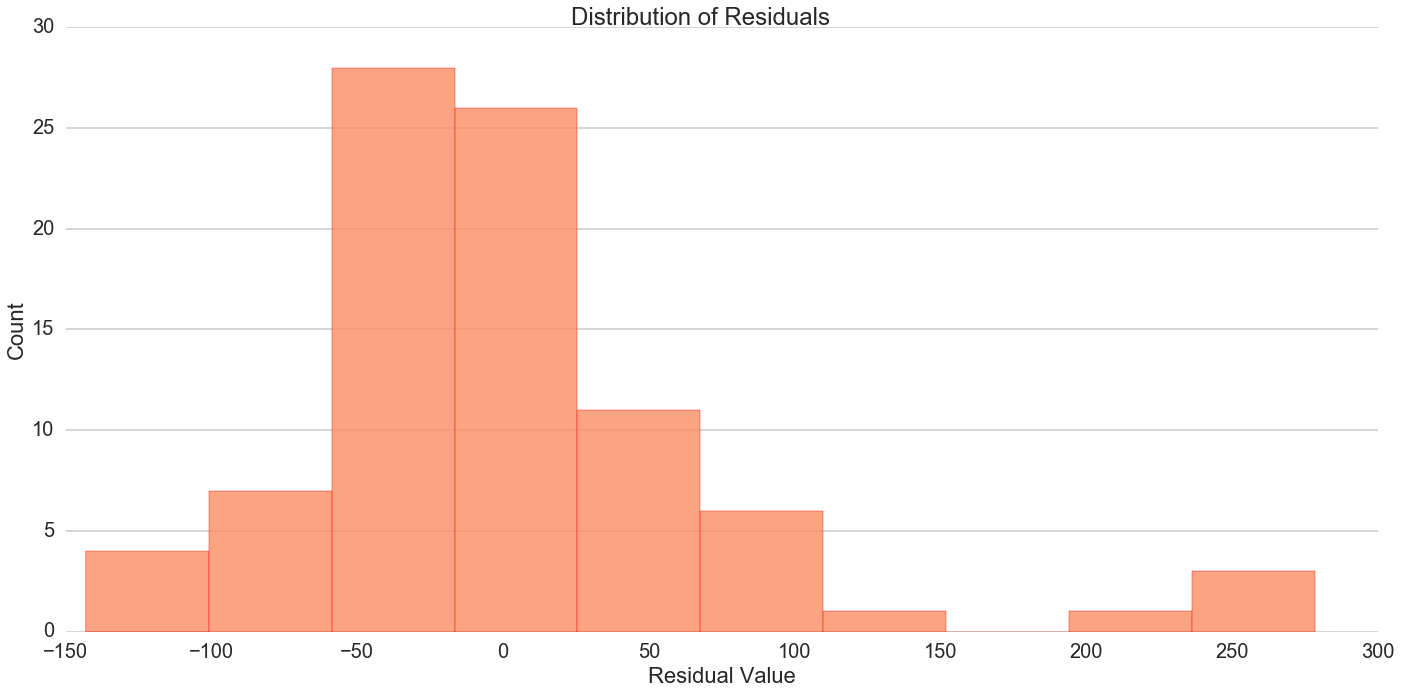

In [10]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colors = sns.color_palette('Set2',12)

res = df['Dom_Gross'] - mdl2.predict(X2)
ax.hist(res, edgecolor='r', alpha = 0.8, color=colors[1])

# labels/titles
plt.suptitle('Distribution of Residuals')
plt.ylabel('Count')
plt.xlabel('Residual Value')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 2 is:
* How can you interpret what's happening in the model?

<font color='blue'>The model has been fit to the feature data as shown by the residuals being more evenly distributed about zero.</font>

___

# <a id='3'></a>Challenge 3:
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [11]:
# convert categorical values (Rated) to numerical
y3, X3 = dmatrices('Dom_Gross ~ Rating', data=df, return_type='dataframe')

In [12]:
features = set(df['Rating'])

# linear regression model
lrm3 = LinearRegression()
mdl3 = lrm3.fit(X3,y3)

In [13]:
# model intercept and coefficients
coefs = list(zip(features, mdl3.coef_[0]))

print('Intercept: {0}'.format(mdl3.intercept_))
print('Coeficients: {0}'.format(coefs))

Intercept: [ 131.94586957]
Coeficients: [('PG-13', 0.0), ('R', -14.219257146428561), ('PG', -57.717920783549815)]


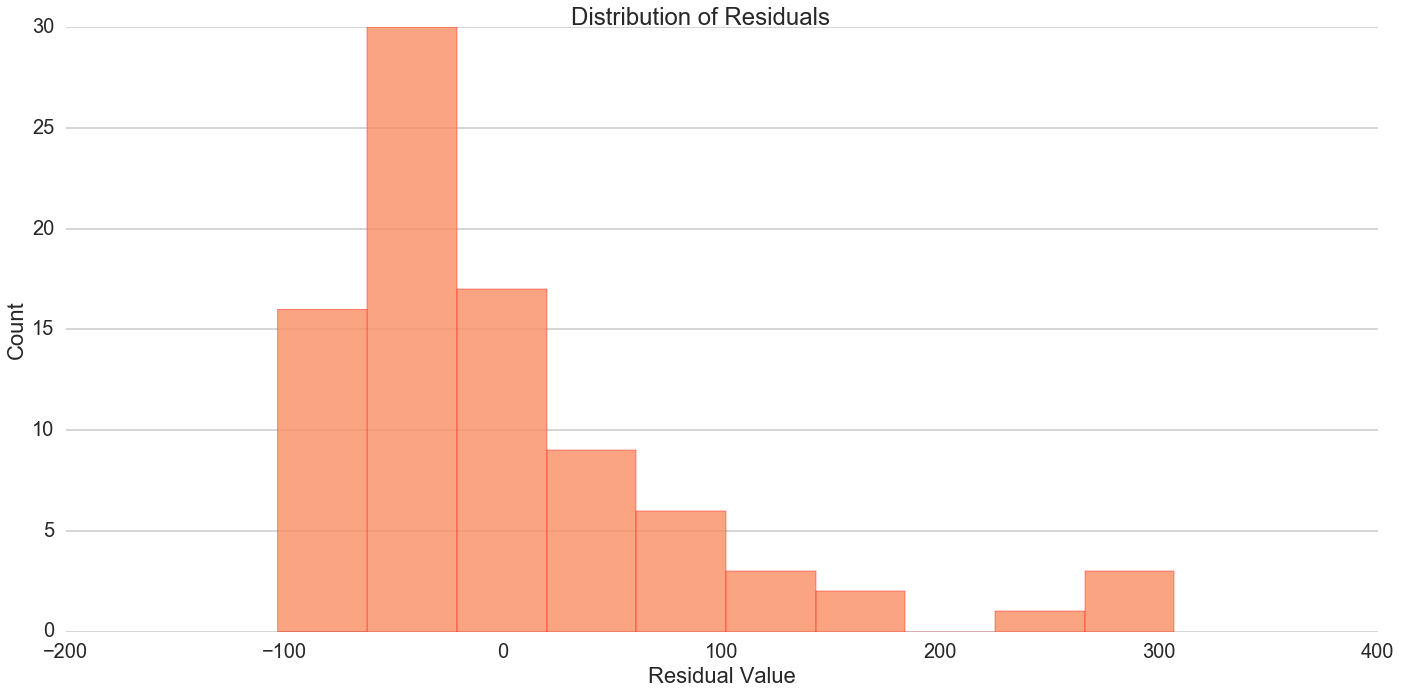

In [14]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colors = sns.color_palette('Set2',12)

res = y3 - mdl3.predict(X3)
res = res['Dom_Gross']
ax.hist(res, edgecolor='r', alpha = 0.8, color=colors[1])

# labels/titles
plt.suptitle('Distribution of Residuals')
plt.ylabel('Count')
plt.xlabel('Residual Value')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [15]:
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dom_Gross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Sat, 23 Jul 2016   Prob (F-statistic):             0.0440
Time:                        14:20:47   Log-Likelihood:                -509.21
No. Observations:                  87   AIC:                             1024.
Df Residuals:                      84   BIC:                             1032.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         131.9459     22.922      5.756      0.000        86.363   177.528
Rating[T.PG-13]   -14.2193     26.633     -0.534      0.595       -67.181    38.743
Rating[T.R]       -57.7179     27.355     -2.110      0.038      -112.117    -3.319
==============================================================================
Omnibus:                       39.974   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           1.759   Prob(JB):                     5.96e-19
Kurtosis:                       6.283   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Answer for Challenge 3 is:
* How can you interpret what's happening in the model?

<font color='blue'>There is not much of a difference in the distribution of residuals when compared with residual histogram in Challenge 2.</font>

___

# <a id='4'></a>Challenge 4:
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [16]:
# convert categorical values (Rated) to numerical
y4, X4 = dmatrices('Dom_Gross ~ Budget + Rating', data=df, return_type='dataframe')

In [17]:
# linear regression model
lrm4 = LinearRegression()
mdl4 = lrm4.fit(X4,y4)

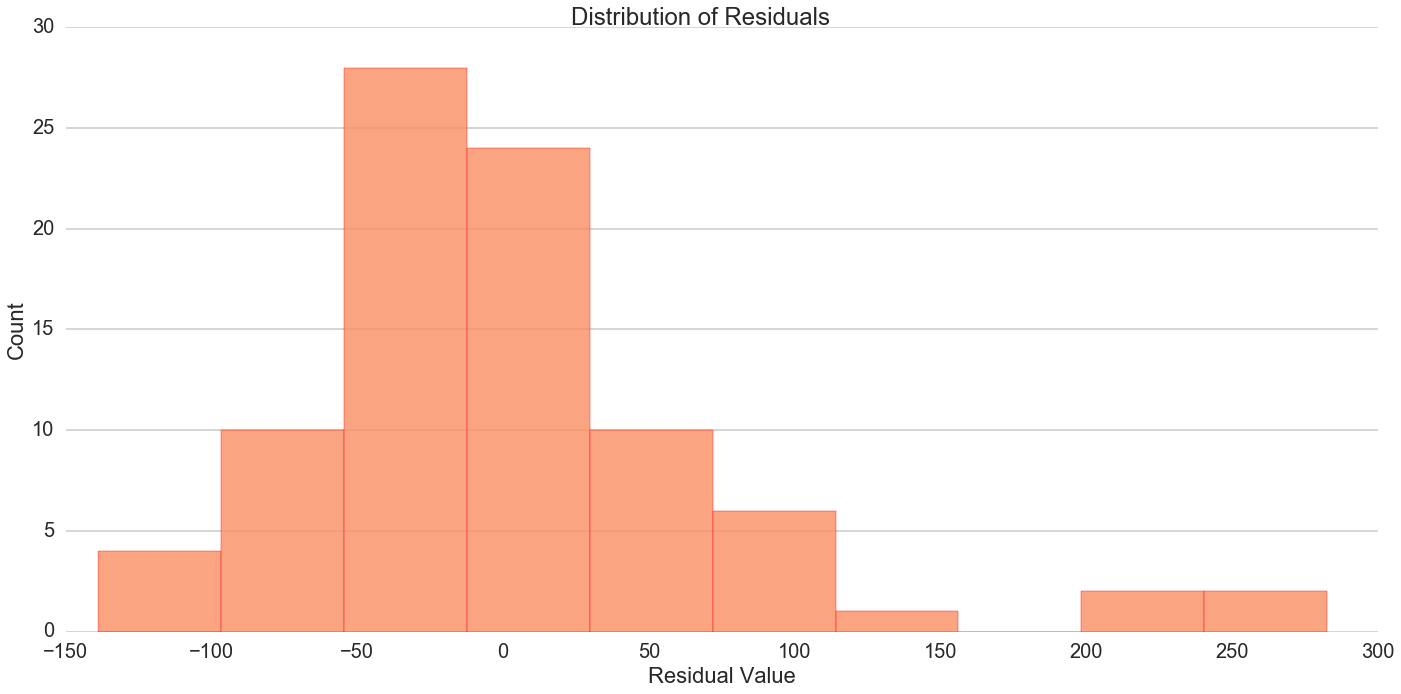

In [18]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colors = sns.color_palette('Set2',12)

res = y4 - mdl4.predict(X4)
res = res['Dom_Gross']
ax.hist(res, edgecolor='r', alpha = 0.8, color=colors[1])

# labels/titles
plt.suptitle('Distribution of Residuals')
plt.ylabel('Count')
plt.xlabel('Residual Value')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [19]:
# model intercept and coefficients
model4 = sm.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dom_Gross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sat, 23 Jul 2016   Prob (F-statistic):           3.25e-06
Time:                        14:20:48   Log-Likelihood:                -497.74
No. Observations:                  87   AIC:                             1003.
Df Residuals:                      83   BIC:                             1013.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          57.7334     25.066      2.303      0.024         7.878   107.588
Rating[T.PG-13]   -17.1103     23.489     -0.728      0.468       -63.829    29.609
Rating[T.R]       -13.8423     25.663     -0.539      0.591       -64.885    37.200
Budget              0.7806      0.156      5.005      0.000         0.470     1.091
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                         461.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Answer for Challenge 4 is:

<font color='blue'>Charts and information shown above</font>
___

# <a id='5'></a>Challenge 5:
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [20]:
# split data set 80/20 train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.20, random_state=9)

In [21]:
# linear regression model
lrm5 = LinearRegression()
mdl5 = lrm5.fit(X_train,y_train)

In [22]:
# model intercept and coefficients
model5 = sm.OLS(y_train, X_train)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dom_Gross   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     12.77
Date:                Sat, 23 Jul 2016   Prob (F-statistic):           1.17e-06
Time:                        14:20:48   Log-Likelihood:                -392.90
No. Observations:                  69   AIC:                             793.8
Df Residuals:                      65   BIC:                             802.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          43.8487     28.422      1.543      0.128       -12.914   100.612
Rating[T.PG-13]    -5.6210     26.561     -0.212      0.833       -58.667    47.425
Rating[T.R]        -8.0989     29.609     -0.274      0.785       -67.233    51.035
Budget              0.8827      0.164      5.374      0.000         0.555     1.211
==============================================================================
Omnibus:                       25.527   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.047
Skew:                           1.255   Prob(JB):                     1.36e-11
Kurtosis:                       6.333   Cond. No.                         496.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

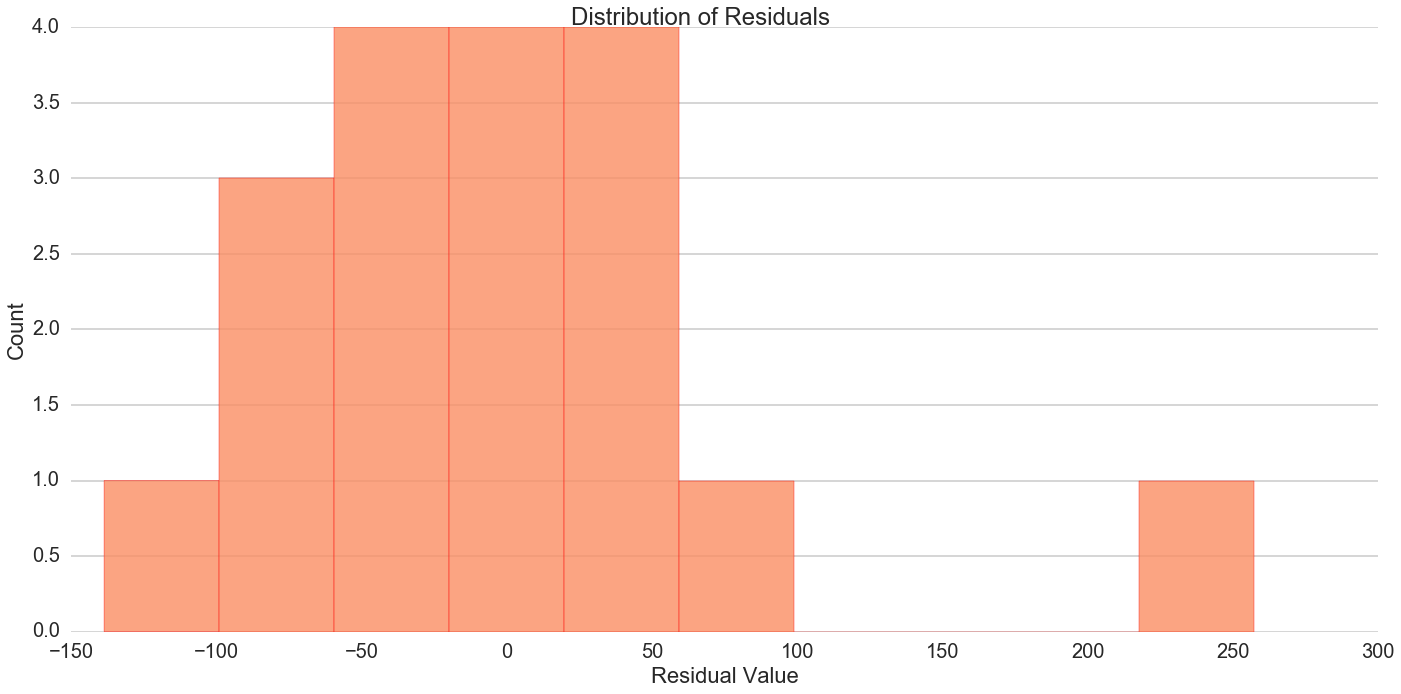

In [23]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colors = sns.color_palette('Set2',12)

res = y_test - mdl5.predict(X_test)
res = res['Dom_Gross']
ax.hist(res, edgecolor='r', alpha = 0.8, color=colors[1])

# labels/titles
plt.suptitle('Distribution of Residuals')
plt.ylabel('Count')
plt.xlabel('Residual Value')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

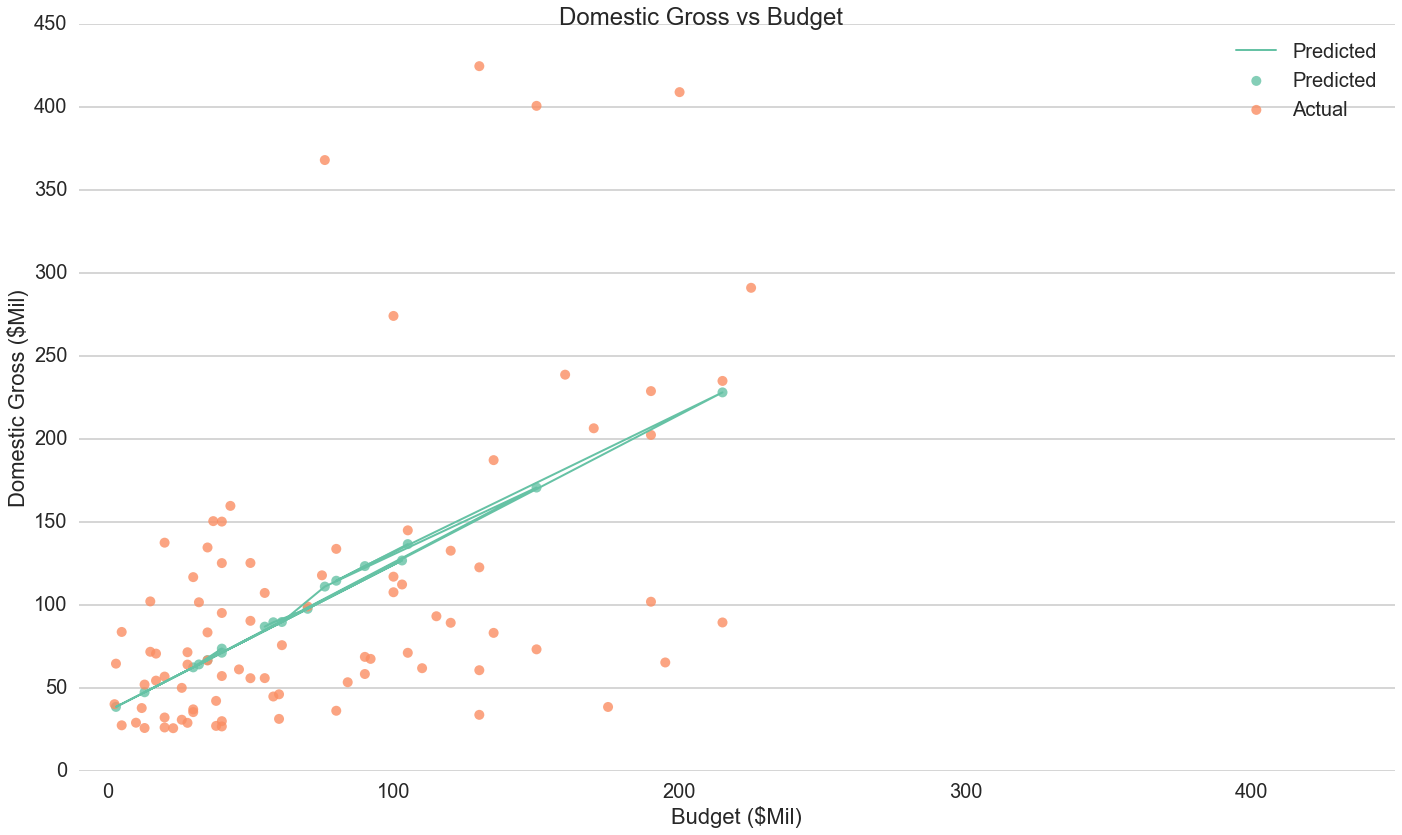

In [24]:
# make figure
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

# color 
colors = sns.color_palette('Set2',12)

# plots
ax.plot(X_test['Budget'], mdl5.predict(X_test), color=colors[0], linewidth=2.0, label='Predicted')
ax.scatter(X_test['Budget'], mdl5.predict(X_test), s=100, c=colors[0], alpha=0.8, label='Predicted', edgecolor='None')
ax.scatter(df['Budget'], df['Dom_Gross'], s=100, c=colors[1], alpha=0.8, label='Actual', edgecolor='None')

# axis limits
plt.xlim(-10,450)

# labels/titles
plt.legend(loc='upper right');
plt.suptitle('Domestic Gross vs Budget')
plt.xlabel('Budget ($Mil)')
plt.ylabel('Domestic Gross ($Mil)')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 5 is:

<font color='blue'>Charts and information shown above</font>
___